# Students performance in Exams

## <font color='yellow'> Introduction</font>
![Students performance in Exams.jpg](<attachment:Students performance in Exams.jpg>)</br></br>
The main aim of this project is to analyse how are the scores impacted based on different features which include gender, race, lunch, test preparation course etc.

Each column is picked and has been analysed how they affect the scores. For easy understanding I have used graphs and plots. After all visualisation is the best way to understand.
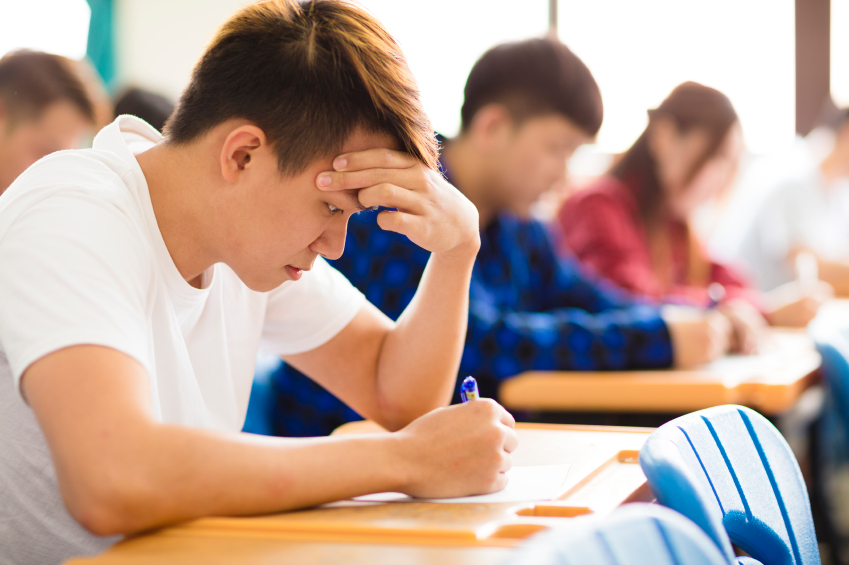

<strong> <font color='yellow'><h1>Task: 1 </h1></font></strong>
- Download the dataset and create an IPython Notebook or a Google Colab
notebook for this assignment.

<b><font color='green'><h2>Task 1 has been DONE Successfully.</h2></font></b>

<strong> <font color='yellow'><h1>Task: 2</h1> </font></strong>
- Load the dataset into a pandas dataframe and display the first 10 rows of the
dataframe to gain familiarity with the data structure.

### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load The Data 

In [3]:
df = pd.read_csv(r"../data/StudentsPerformance.csv")
df.head(10)

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
5                    none          71             83             78  
6               completed          88             95             92  
7                    none          40             43             39  
8               completed          64             64             67  
9                    none          38             60             50

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

In [6]:
# There is dataType:
# int64 = 3, object = 5
# Total 8 columns and 1000 rows are there

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<b><font color='green'><h2>Task 2 has been DONE Successfully.</h2></font></b>

<strong> <font color='yellow'><h1>Task: 3</h1> </font></strong>
Perform exploratory data analysis:
- Check for missing values and handle them accordingly (if any).
- Check for outliers and handle them accordingly (if any).
- Provide a brief summary of your data, such as descriptive statistics and data
types.

In [8]:
# Check for missing values and handle them accordingly (if any).
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.isnull().sum().value_counts()

0    8
Name: count, dtype: int64

As we can see there is no missing values

In [10]:
# let's rename all the columns

df.rename(columns = {'race/ethnicity':'race',
                     'parental level of education': 'parental_level_of_education',
                     'test preparation course': 'test_preparation_course',
                     'math score': 'math_score',
                     'reading score': 'reading_score',
                     'writing score': 'writing_score',
                     }, inplace = True)

# Handling Outliers
- Ways to handle
    - Detect Outliers
    - Dropping outliers
    - Imputation - **Median**
    - Quantile-based flooring and capping
    - Transformations - Log transformation can help to reduce the effect of outliers

* if the data is categorical then we have to use "Mode"
* if data is numerical, we have to use "mean", and "median".

# Percentile Technique

In [11]:
df2 = df.copy()

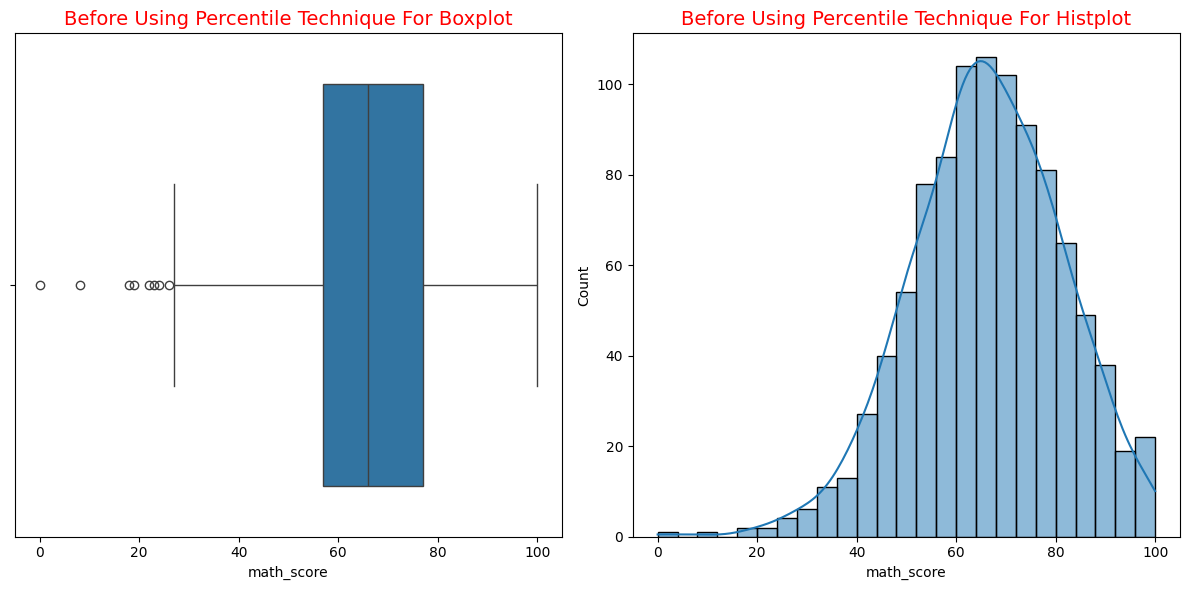

In [12]:
# Check for outliers and handle them accordingly (if any).
# Let's check all numerical columns
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot( data = df2, x = "math_score")
plt.title("Before Using Percentile Technique For Boxplot", color='red', size=14)

plt.subplot(1,2,2)
sns.histplot( df2.math_score, kde = True)
plt.title("Before Using Percentile Technique For Histplot", color='red', size=14)

plt.tight_layout()
plt.show()

As we see there are some outliers let's handle them by using different Techniques

In [13]:
lower_limit, upper_limit = df2.math_score.quantile([0.001, 0.999])
lower_limit, upper_limit

(7.992, 100.0)

In [14]:
outliers = df[(df2.math_score>upper_limit) | (df2.math_score<lower_limit)]
outliers.head()

gender     race parental_level_of_education         lunch  \
59  female  group C            some high school  free/reduced   

   test_preparation_course  math_score  reading_score  writing_score  
59                    none           0             17             10

In [15]:
df2 = df2[(df2.math_score>lower_limit)&(df2.math_score<upper_limit)]
df2.shape

(992, 8)

In [16]:
df.shape

(1000, 8)

In [17]:
df.shape[0] - df2.shape[0]

8

As we can see there is total 8 outliers between 1000

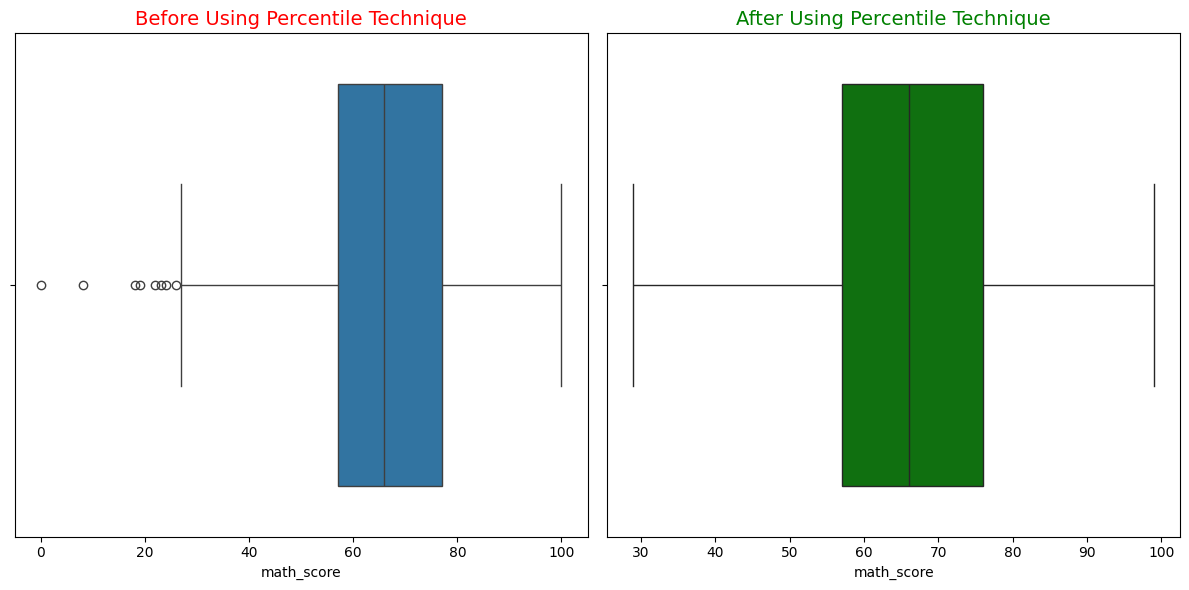

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="math_score")
plt.title("Before Using Percentile Technique", color='red', fontsize=14)

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=df2, x="math_score", showfliers=False, color='green')
ax.set_title("After Using Percentile Technique", fontsize=14, color='green') 
plt.tight_layout()

plt.show()

Histplot: 


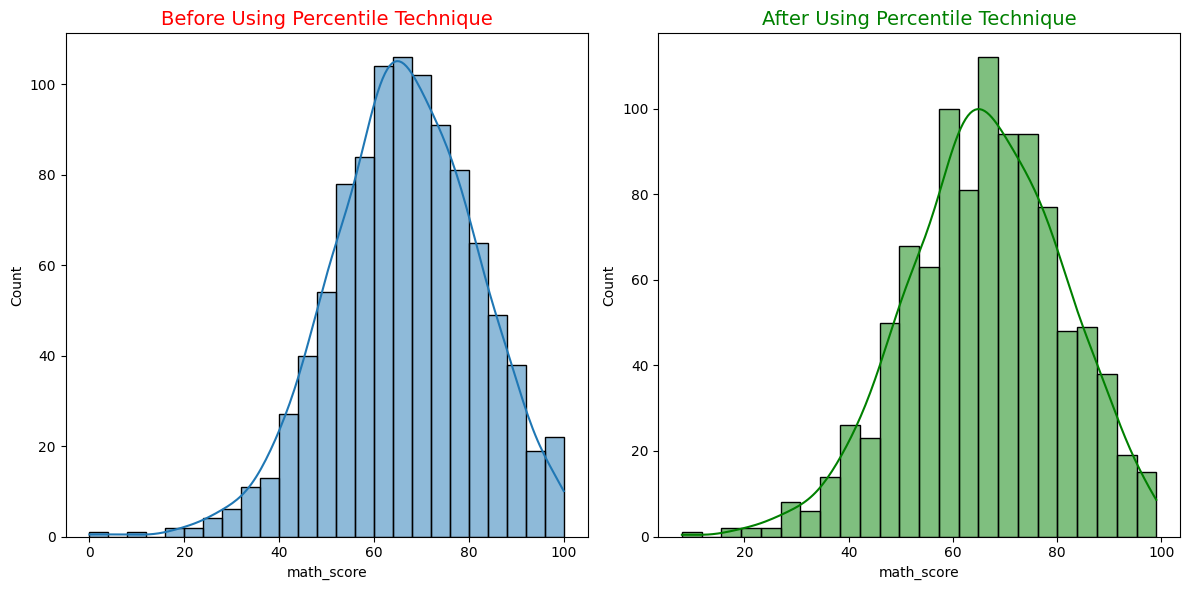

In [19]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df.math_score, kde=True)
plt.title("Before Using Percentile Technique", color='red', size=14)

plt.subplot(1,2,2)
sns.histplot( df2.math_score, kde=True, color='green')
plt.title("After Using Percentile Technique", color='green', size=14)

plt.tight_layout()
print('Histplot: ')
plt.show()

# IQR (Inter quartile Range) Method:

In [20]:
df3 = df.copy()

In [21]:
# using IQR
q1 = df3['math_score'].quantile(0.25) # 25% 
q3 = df3['math_score'].quantile(0.75) #75%
q3, q1

(77.0, 57.0)

In [22]:
#### Determine the distance between the quartiles(IQR)
IQR = q3 - q1 #(77.0 - 57.0)
IQR

20.0

In [23]:
lower = q1 - (1.5*IQR) # 57.0 - ( 1.5 * 20.0 )
upper = q3 + (1.5*IQR) # 77.0 + ( 1.5 * 20.0 )

In [24]:
lower, upper

(27.0, 107.0)

In [25]:
floor = df3['math_score'].quantile(0.010)
cap = df3['math_score'].quantile(0.90)

In [26]:
df3.loc[(df3['math_score'] > upper), 'math_score'] = cap
df3.loc[(df3['math_score'] < lower), 'math_score'] = floor

Histplot: 


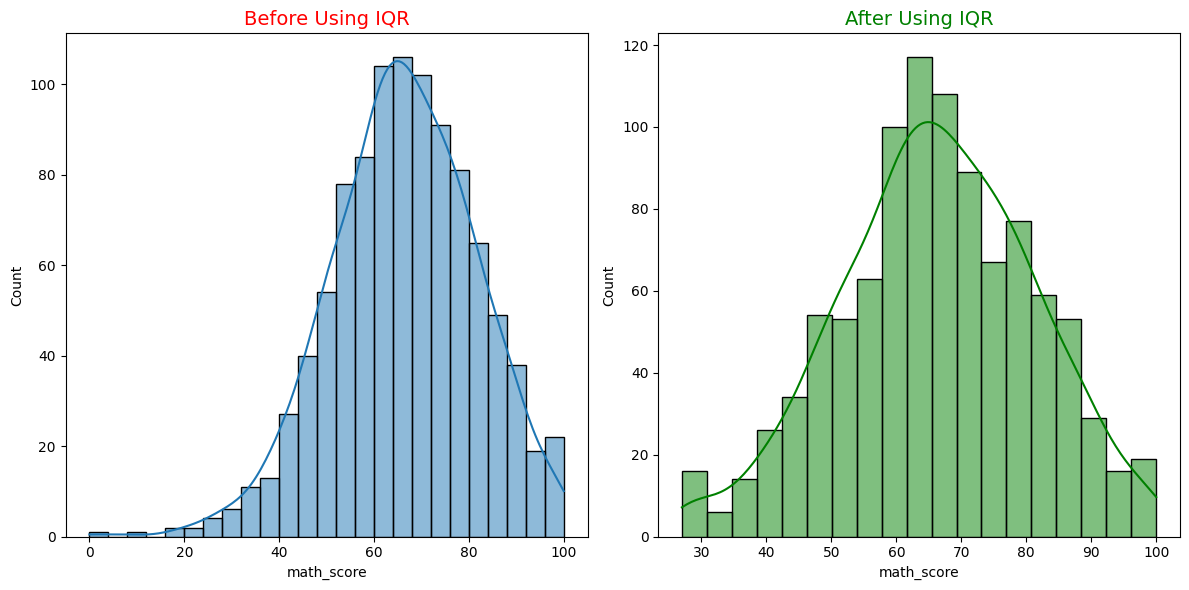

In [27]:
plt.figure(figsize=(12, 6))

# Create subplots
plt.subplot(1, 2, 1)
sns.histplot(df.math_score, kde=True)
plt.title('Before Using IQR', color='red', size=14)

plt.subplot(1, 2, 2)
sns.histplot(df3.math_score, kde=True, color='green')
plt.title('After Using IQR', color='green', size=14)

plt.tight_layout()
print('Histplot: ')
plt.show()

BoxPlot: 


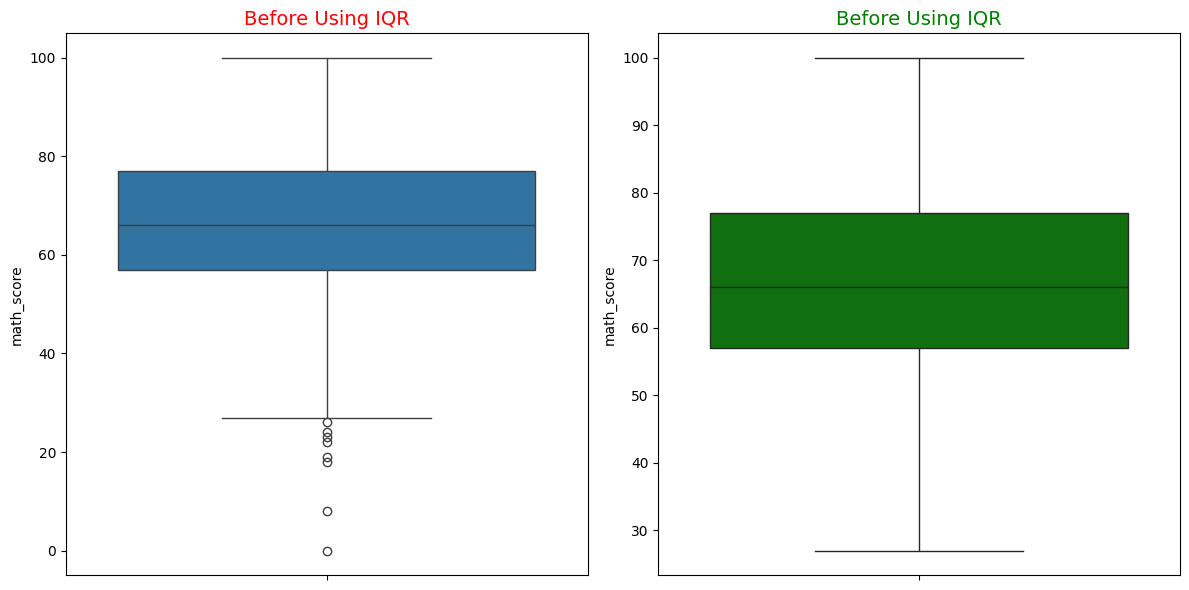

In [28]:
plt.figure(figsize=(12, 6))

# Create subplots
plt.subplot(1, 2, 1)
sns.boxplot(df.math_score)
plt.title('Before Using IQR', color='red', size=14)

plt.subplot(1, 2, 2)
sns.boxplot(df3.math_score, color='green')
plt.title('Before Using IQR', color='green', size=14)

plt.tight_layout()
print('BoxPlot: ')
plt.show()

# z-score Technique 

In [29]:
df4 = df.copy()

In [30]:
df4['zscore'] = (df4.math_score-df4.math_score.mean())/df4.math_score.std()
df4.sample(10)

gender     race parental_level_of_education         lunch  \
729    male  group C                some college      standard   
705    male  group A           bachelor's degree  free/reduced   
299    male  group D          associate's degree  free/reduced   
139    male  group D                some college      standard   
343    male  group D          associate's degree      standard   
598  female  group D                 high school      standard   
927  female  group D                 high school  free/reduced   
279    male  group B           bachelor's degree  free/reduced   
777  female  group C                some college  free/reduced   
264    male  group D                 high school      standard   

    test_preparation_course  math_score  reading_score  writing_score  \
729                    none          53             39             37   
705                    none          62             72             65   
299                    none          90             87             75   
139               completed          71             61             69   
343               completed          67             72             67   
598                    none          69             77             73   
927               completed          65             61             71   
279                    none          73             56             57   
777                    none          35             44             43   
264                    none          76             73             68   

       zscore  
729 -0.863215  
705 -0.269668  
299  1.576922  
139  0.323879  
343  0.060080  
598  0.191979  
927 -0.071819  
279  0.455778  
777 -2.050309  
264  0.653627

In [31]:
outliers_z = df4[(df4.zscore < -4) | (df4.zscore>4)]
outliers_z.shape

(1, 9)

In [32]:
df4 = df4[(df4.zscore>-4)&(df4.zscore<4)]
df4.shape

(999, 9)

In [33]:
df.shape[0] - df4.shape[0]

1

### As you see we can find just 1 outlier by using z-score 

BoxPlot: 


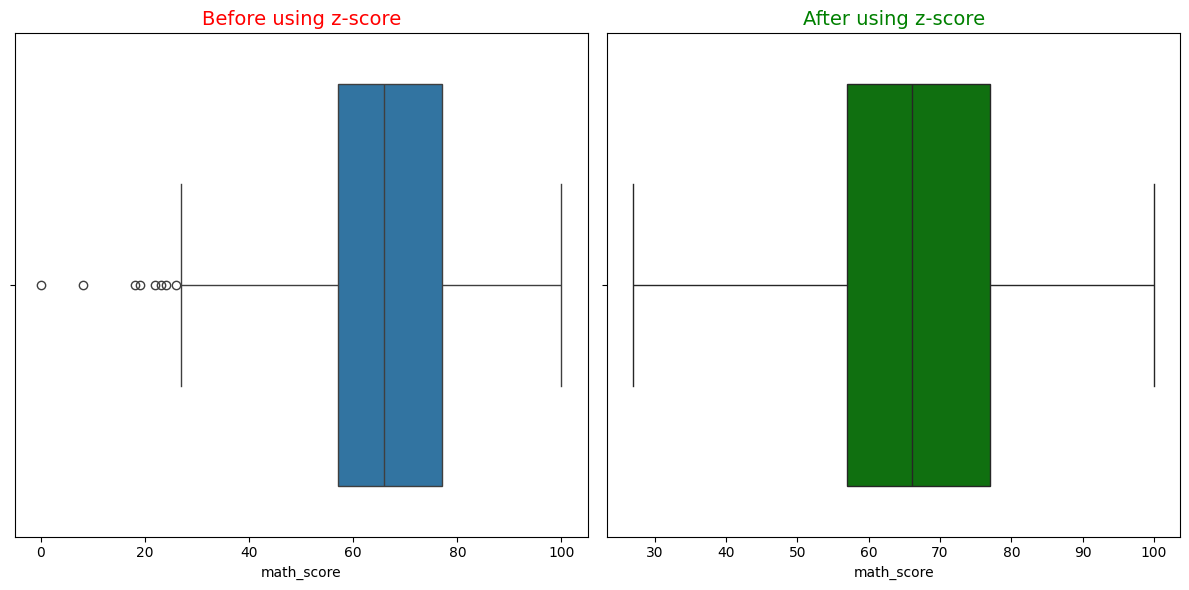

In [34]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'math_score')
plt.title("Before using z-score", color='red', size=14)

plt.subplot(1,2,2)
sns.boxplot(data = df4, x = 'math_score', showfliers=False, color='green')
plt.title("After using z-score", color='green', size=14)

plt.tight_layout()
print('BoxPlot: ')
plt.show()

In [35]:
# df4 = df4.fillna(df4.math_score.median())

Histplot: 


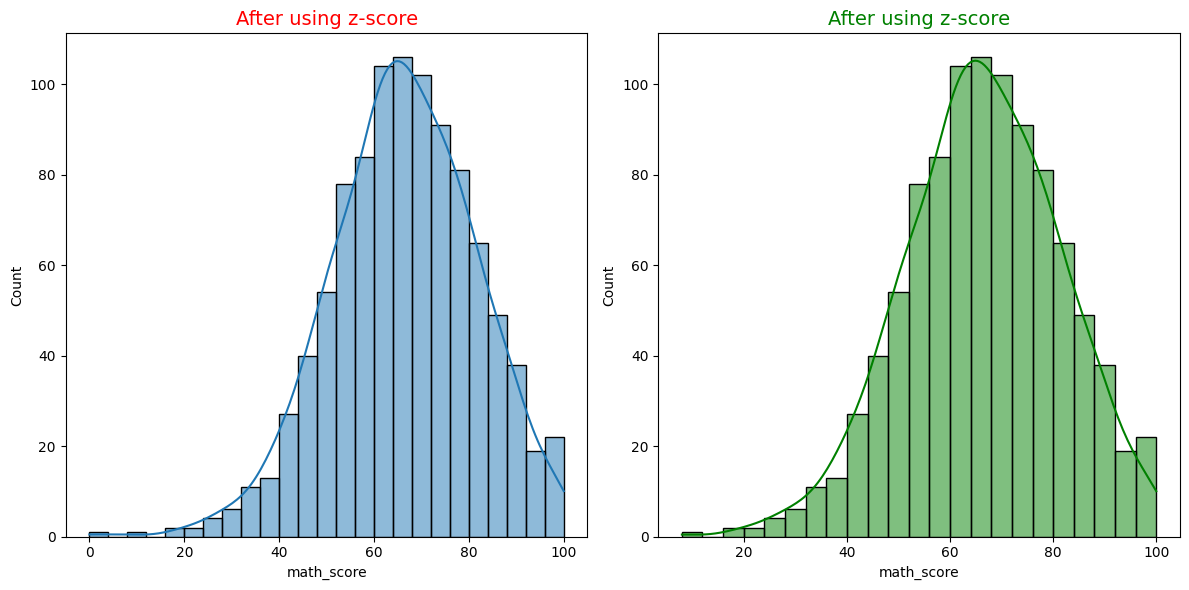

In [36]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df.math_score, kde=True)
plt.title('After using z-score', color='red', size=14)

plt.subplot(1,2,2)
sns.histplot(df4.math_score, kde=True, color='green')
plt.title('After using z-score', color='green', size=14)

plt.tight_layout()
print('Histplot: ')
plt.show()

# 4 standard deviation Technique
This is as like as z-score

In [37]:
df5 = df.copy()

In [38]:
df5.math_score.describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

In [39]:
max_limit = df5.math_score.mean() + 4*df5.math_score.std() 
min_limit = df5.math_score.mean() - 4*df5.math_score.std()
max_limit, min_limit

(126.7413203840378, 5.436679615962198)

In [40]:
# df5.math_score.mean() = 66.08900
# df5.math_score.std() = 15.16308
print(f"max_limit: {66.08900 + 4 * 15.16308}")
print(f"min_limit: {66.08900 - 4 * 15.16308}")

max_limit: 126.74132
min_limit: 5.4366799999999955


In [41]:
df5[(df5.math_score>max_limit) | (df5.math_score<min_limit)].sample()

gender     race parental_level_of_education         lunch  \
59  female  group C            some high school  free/reduced   

   test_preparation_course  math_score  reading_score  writing_score  
59                    none           0             17             10

In [42]:
df5 = df5[(df5.math_score>min_limit) & (df5.math_score<max_limit)]
df5.shape

(999, 8)

In [43]:
df.shape[0]-df5.shape[0]

1

Have a look z-score and 4 standard deviation both result are same we can call it both are same technique

BoxPlot: 


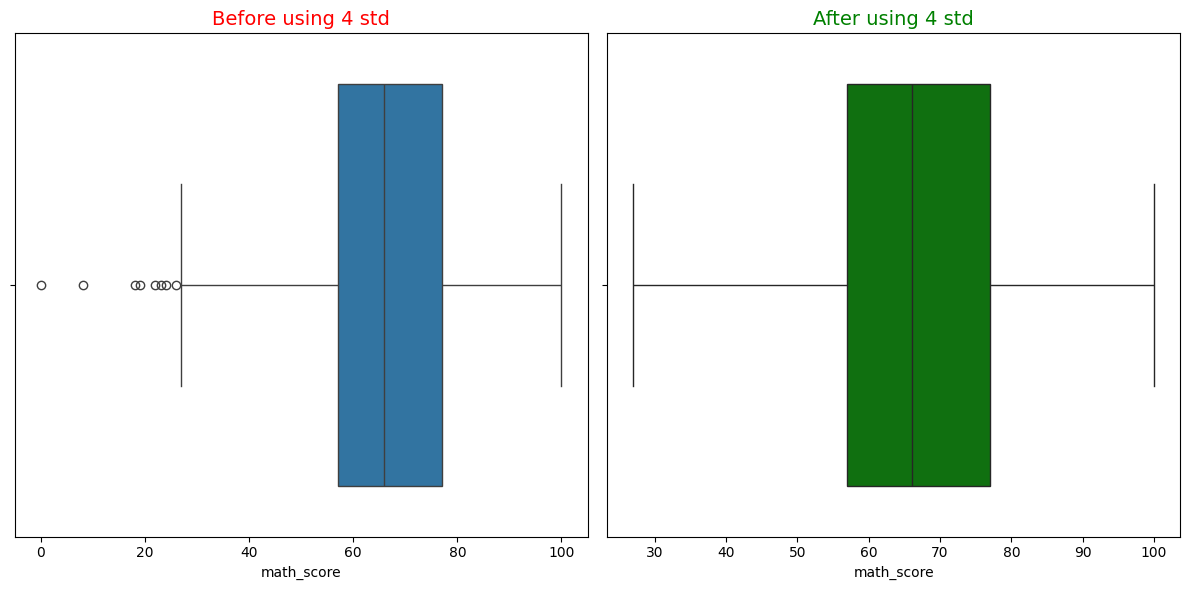

In [44]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'math_score')
plt.title("Before using 4 std", color='red', size=14)

plt.subplot(1,2,2)
sns.boxplot(data = df5, x = 'math_score', showfliers=False, color='green')
plt.title("After using 4 std", color='green', size=14)

plt.tight_layout()
print('BoxPlot: ')
plt.show()

Histplot: 


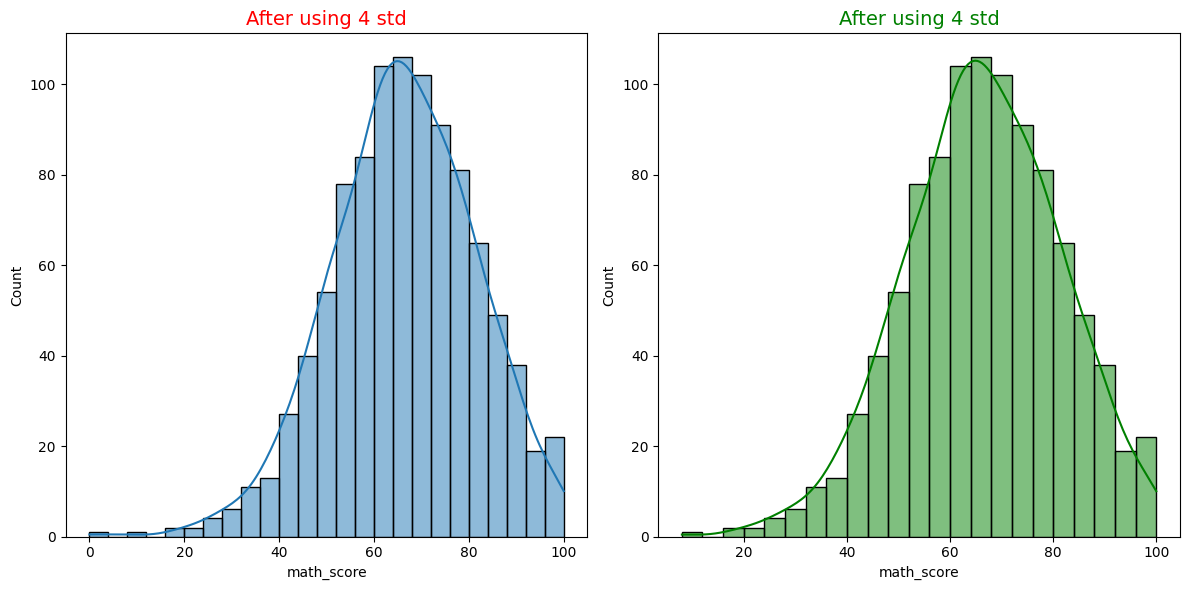

In [45]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df.math_score, kde=True)
plt.title('After using 4 std', color='red', size=14)

plt.subplot(1,2,2)
sns.histplot(df5.math_score, kde=True, color='green')
plt.title('After using 4 std', color='green', size=14)

plt.tight_layout()
print('Histplot: ')
plt.show()

### Provide a brief summary of your data, such as descriptive statistics and data types.

In [46]:
# summary of data describe
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Here we have 3 Numerical columns in our dataset:</br>
- math_score
- reading_score
- writing_score</br>

Descriptive statistics such as mean, standard deviation, minimum, and maximum values give us insights into the central tendency and variability of numerical data.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race                         1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB



Data Types:</br>
- numerical(int64) = 3
- categorical(object) = 5

Total_Columns = 8</br>

The data types summary informs us about how each column is structured, whether it's numerical, categorical, or datetime.

In [48]:
df.shape

(1000, 8)

Our dataset contains 1000 of rows observations across 8 of columns.

This summary helps us understand the basic properties of our dataset, including its size, structure, and the nature of the variables it contains. It serves as a foundation for further analysis and exploration.

<b><font color='green'><h2>Task 3 has been DONE Successfully.</h2></font></b>

<strong> <font color='yellow'><h1>Task: 4 </h1></font></strong>
Perform data visualization:
- Create a bar plot to show the distribution of male and female students in the
dataset.
- Create a histogram to show the distribution of the scores in math, reading,
and writing.
- Create a bar plot to show the average scores in math, reading, and writing
for each gender.
- Create a scatter plot to show the relationship between math, reading, and
writing scores.

In [49]:
df.head()

gender     race parental_level_of_education         lunch  \
0  female  group B           bachelor's degree      standard   
1  female  group C                some college      standard   
2  female  group B             master's degree      standard   
3    male  group A          associate's degree  free/reduced   
4    male  group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [50]:
Numerical_Columns = df[['math_score','reading_score', 'writing_score']]
Categorical_Columns = df[['gender','race', 'parental_level_of_education', 'lunch']]

In [51]:
Numerical_Columns.head()

math_score  reading_score  writing_score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75

In [52]:
Categorical_Columns.head()

gender     race parental_level_of_education         lunch
0  female  group B           bachelor's degree      standard
1  female  group C                some college      standard
2  female  group B             master's degree      standard
3    male  group A          associate's degree  free/reduced
4    male  group C                some college      standard

- Create a bar plot to show the distribution of male and female students in the
dataset.

In [53]:
Categorical_Columns[["gender"]].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [54]:
gender = ["female", "male"]
counts = [518, 482]

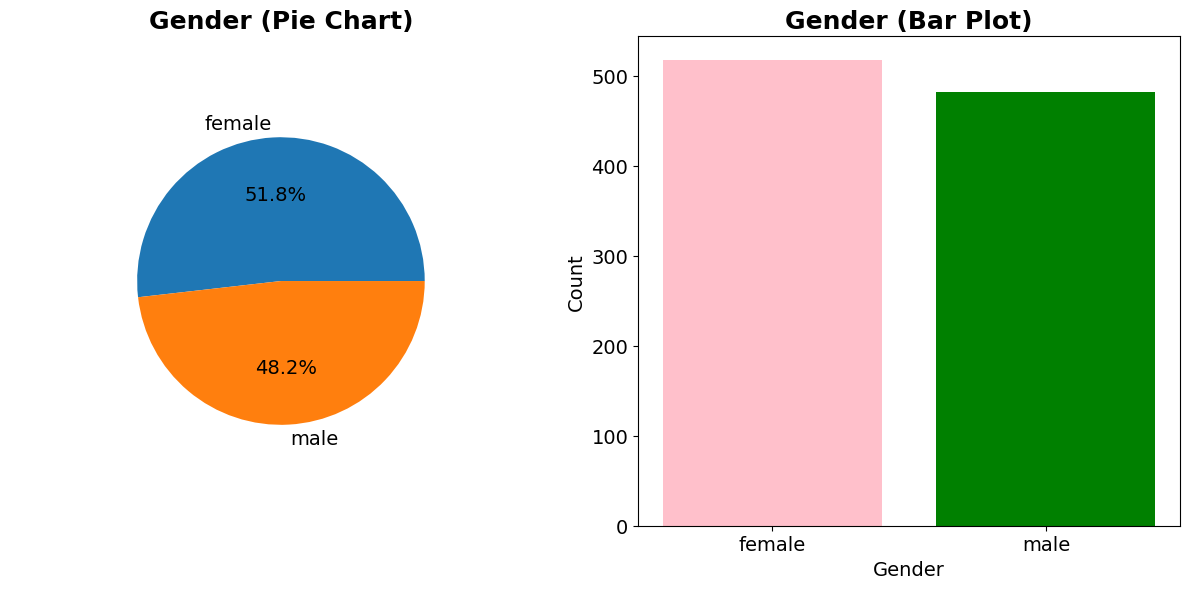

In [55]:
plt.figure(figsize=(12, 6))

# Pie chart (subplot 1)
plt.subplot(1, 2, 1) 
plt.pie(counts, labels=gender, autopct="%1.1f%%", textprops={'fontsize': 14})
plt.title("Gender (Pie Chart)", fontsize=18, fontweight="bold")
plt.axis("equal")
plt.subplots_adjust(top=1.2)

# Bar plot (subplot 2)
plt.subplot(1, 2, 2) 
colors = ['pink', 'green']
plt.bar(gender, counts, color=colors)
plt.title("Gender (Bar Plot)", fontsize=18, fontweight="bold")
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

plt.tight_layout()
plt.show()

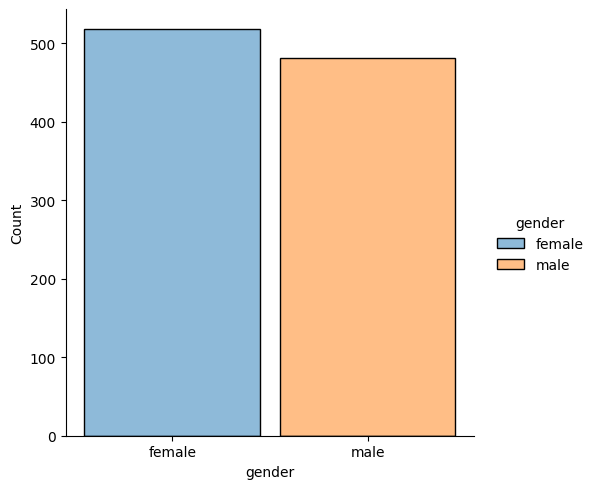

In [56]:
sns.displot(df, x='gender', hue='gender', shrink=0.9)

The distribution based on the students gender and the distribution seems to be almost the same.

In [57]:
Categorical_Columns.race.value_counts()

race
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [58]:
race = ['group A', 'group B', 'group C', 'group D', 'group E']
counts = [89, 190, 319, 262, 140]

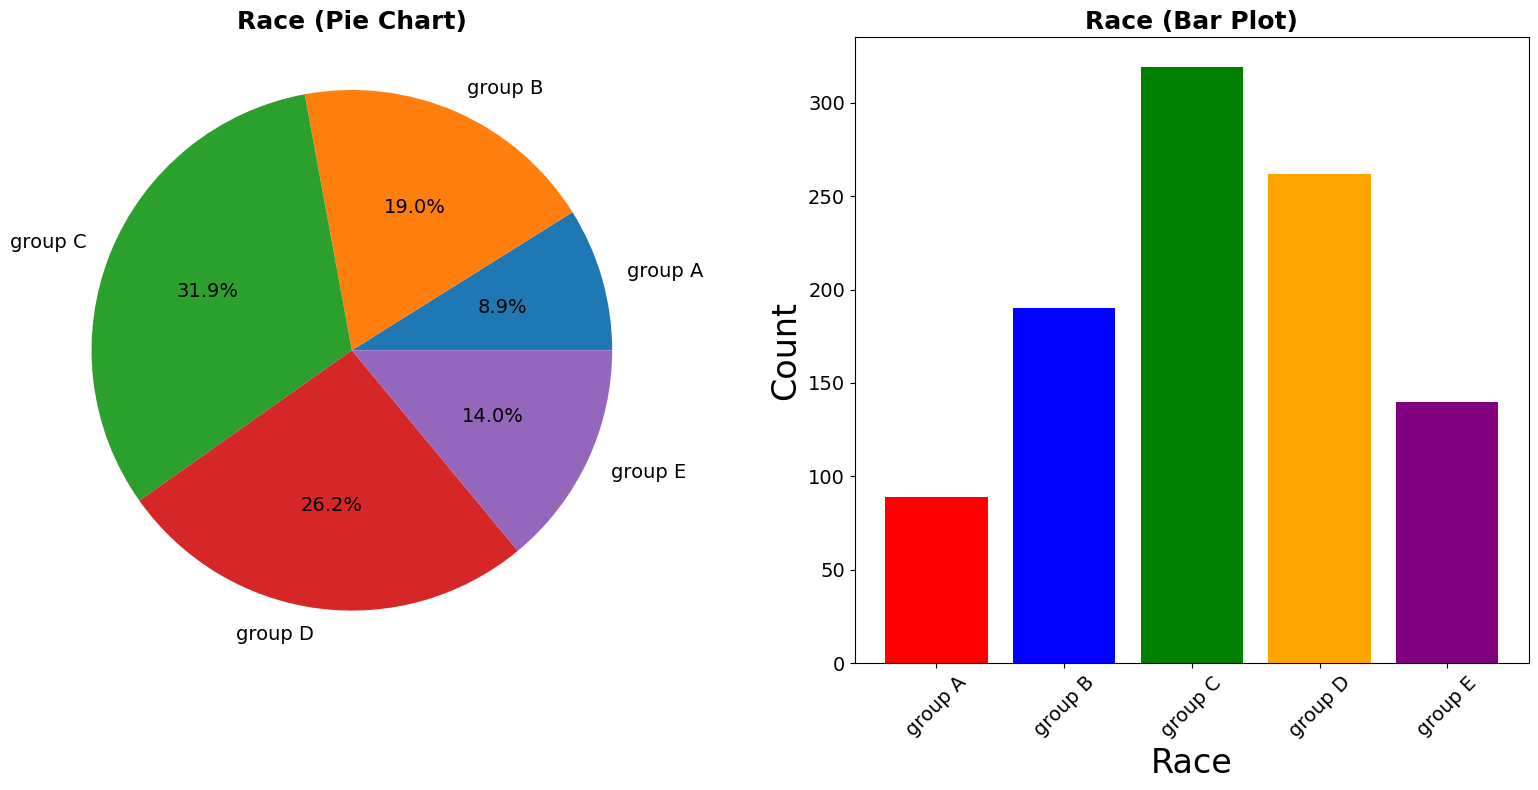

In [59]:
plt.figure(figsize=(16, 8))

# Pie chart (subplot 1)
plt.subplot(1, 2, 1)
plt.pie(counts, labels=race, autopct="%1.1f%%", textprops={'fontsize': 14})
plt.title("Race (Pie Chart)", fontsize=18, fontweight="bold")
plt.axis("equal")

# Bar plot (subplot 2)
plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
plt.bar(race, counts, color=colors)
plt.title("Race (Bar Plot)", fontsize=18, fontweight="bold")
plt.xlabel('Race', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


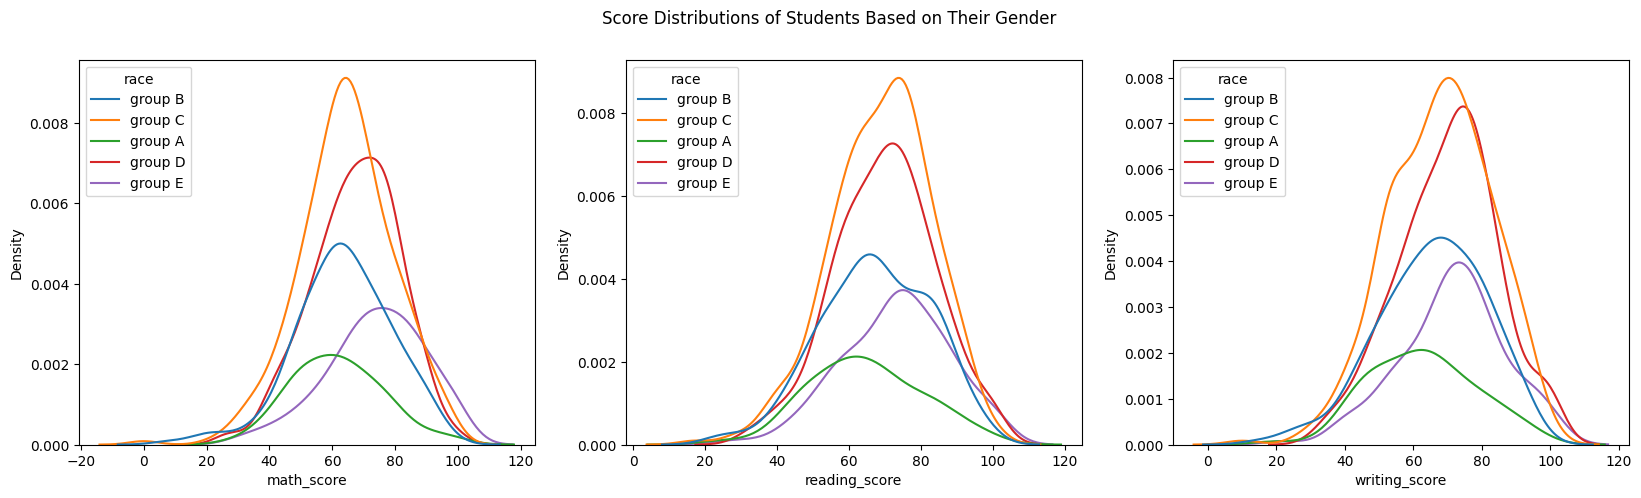

In [60]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

fig.suptitle('Score Distributions of Students Based on Their Gender')

m= sns.kdeplot(data=df, x='math_score', ax=ax[0], hue='race')
r= sns.kdeplot(data=df, x='reading_score', ax=ax[1], hue='race')
w= sns.kdeplot(data=df, x='writing_score', ax=ax[2], hue='race')

sns.move_legend(m, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(r, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(w, "upper left", bbox_to_anchor=(0, 1))

By observing the kde plot above, theres slight shift in between the different groups. Group E had the most right shift compared to the other groups. Therefore, being group E as a race will make you more likely to get higher scores than to those who arent

In [61]:
Categorical_Columns.parental_level_of_education.value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [62]:
parental_level_of_education = ['some college',
                               "associate's degree",
                               'high school',
                               "some high school","bachelor's degree","master's degree"]
counts = [226, 222, 196, 179, 118, 59]

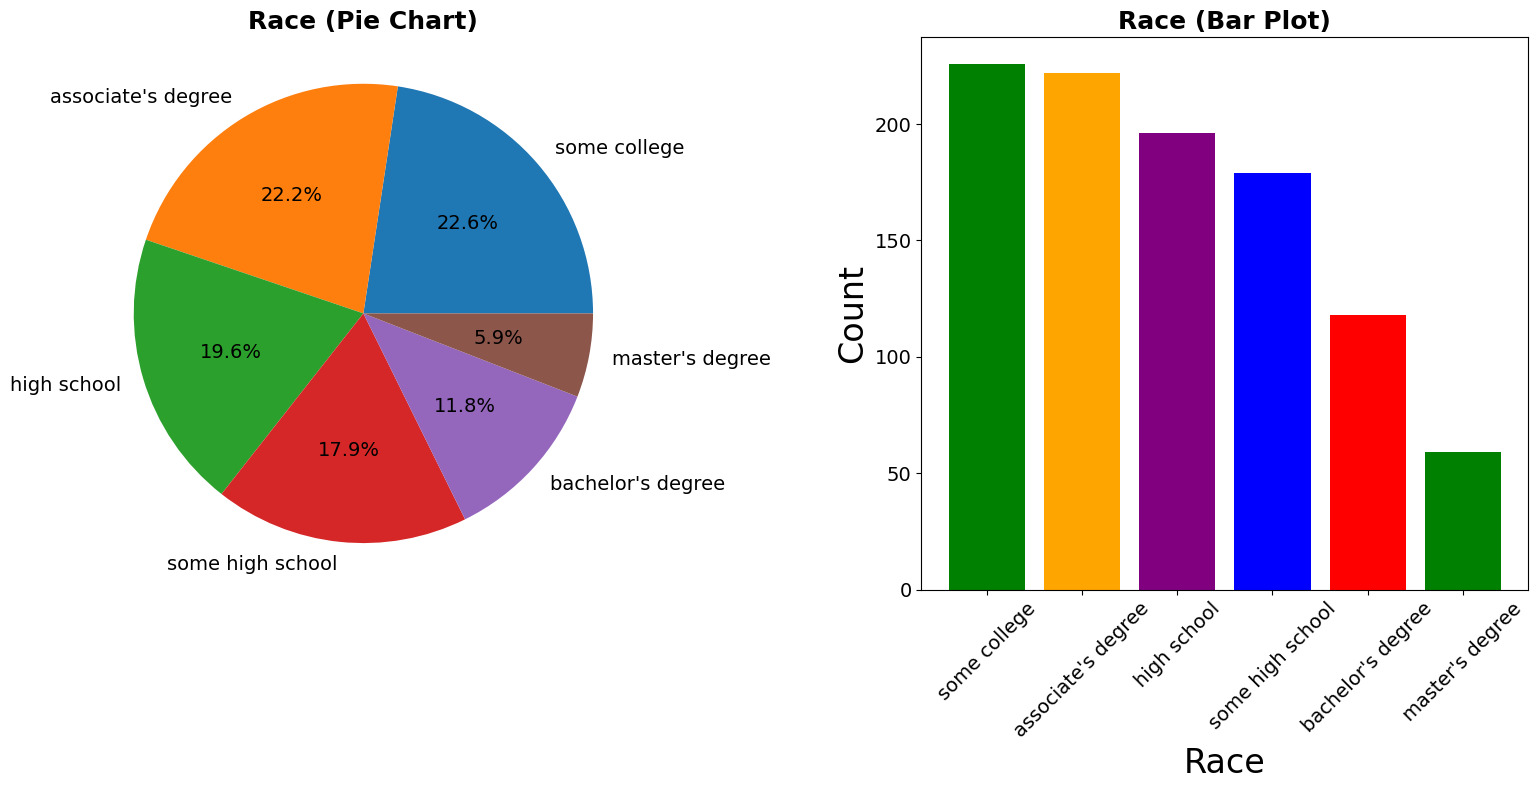

In [63]:
plt.figure(figsize=(16, 8))

# Pie chart (subplot 1)
plt.subplot(1, 2, 1)
plt.pie(counts, labels=parental_level_of_education, autopct="%1.1f%%", textprops={'fontsize': 14})
plt.title("Race (Pie Chart)", fontsize=18, fontweight="bold")
plt.axis("equal")

# Bar plot (subplot 2)
plt.subplot(1, 2, 2)
colors = ['green', 'orange', 'purple', 'blue', 'red']
plt.bar(parental_level_of_education, counts, color=colors)
plt.title("Race (Bar Plot)", fontsize=18, fontweight="bold")
plt.xlabel('Race', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [66]:
Categorical_Columns.lunch.value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [67]:
lunch = ['standard', 'free/reduced']
counts = [645, 355]

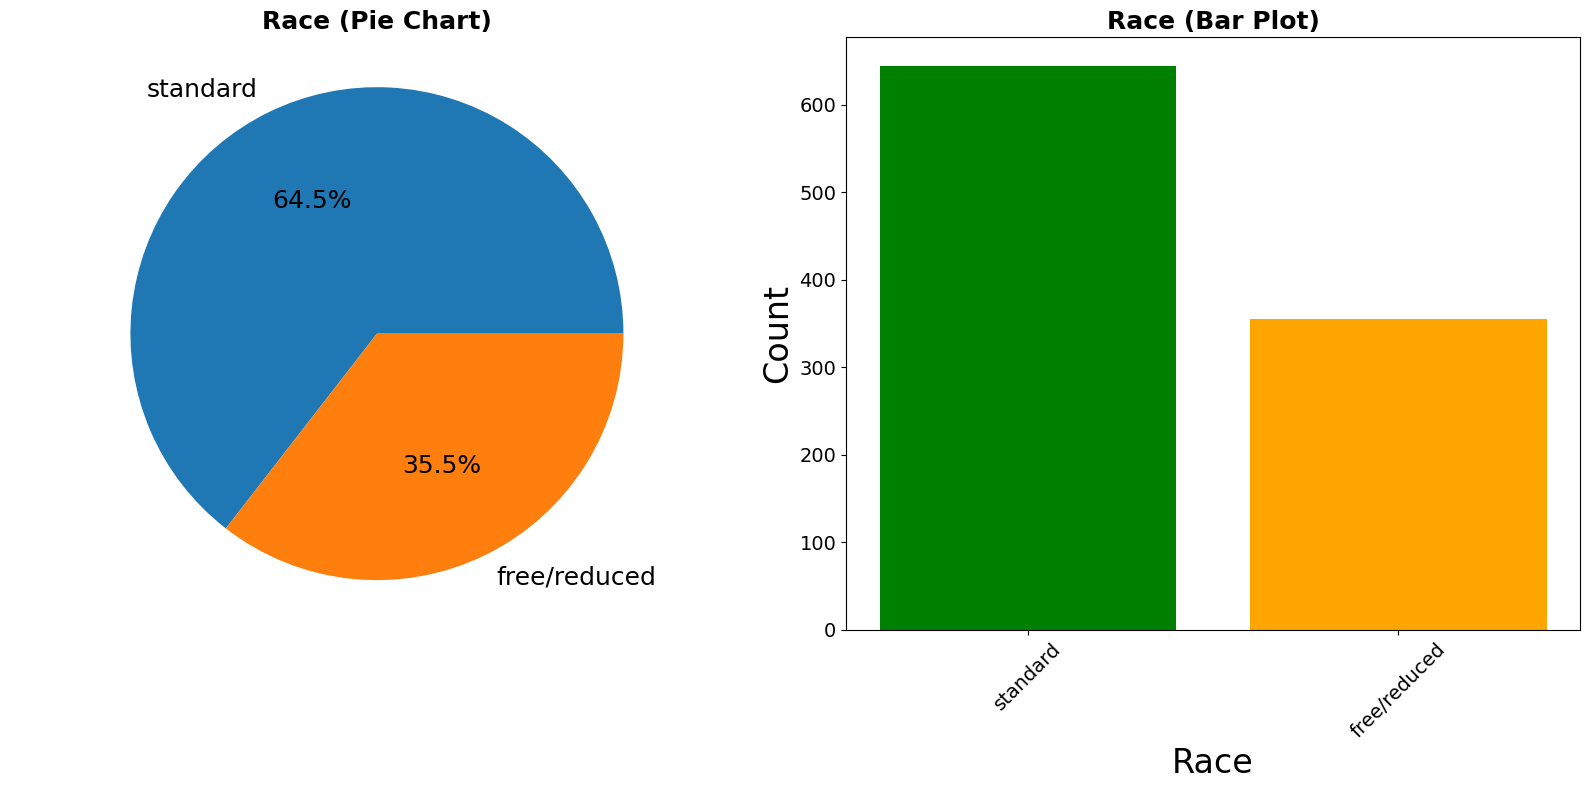

In [68]:
plt.figure(figsize=(16, 8))

# Pie chart (subplot 1)
plt.subplot(1, 2, 1)
plt.pie(counts, labels=lunch, autopct="%1.1f%%", textprops={'fontsize': 18})
plt.title("Race (Pie Chart)", fontsize=18, fontweight="bold")
plt.axis("equal")

# Bar plot (subplot 2)
plt.subplot(1, 2, 2)
colors = ['green', 'orange', 'purple', 'blue', 'red']
plt.bar(lunch, counts, color=colors)
plt.title("Race (Bar Plot)", fontsize=18, fontweight="bold")
plt.xlabel('Race', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

- Create a histogram to show the distribution of the scores in math, reading,
and writing.

# Using Matplotlib:

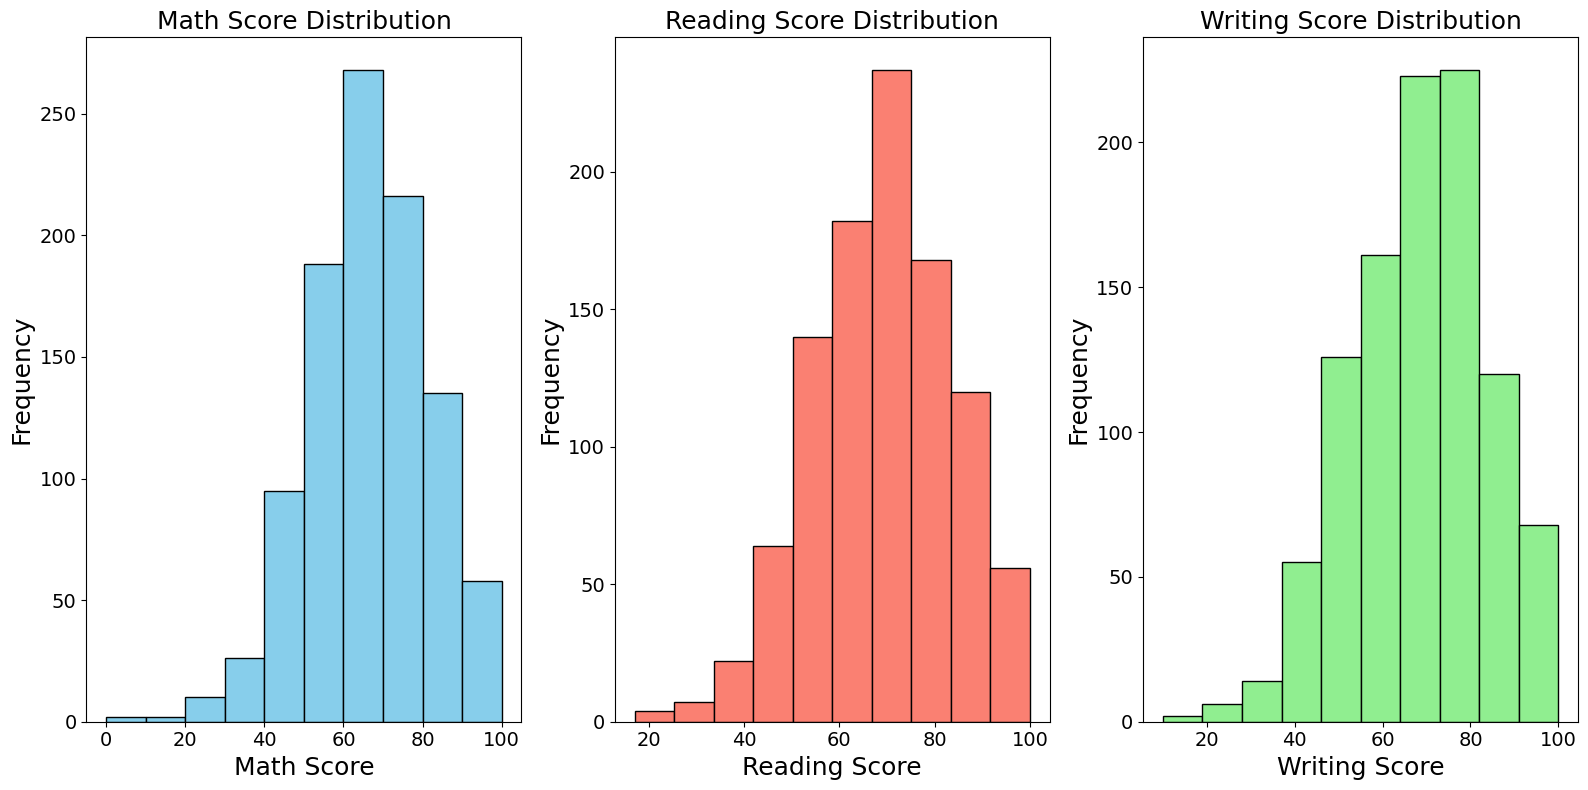

In [69]:
plt.figure(figsize=(16, 8))

# Histogram for math scores
plt.subplot(1, 3, 1)
plt.hist(Numerical_Columns['math_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Math Score Distribution', fontsize=18)
plt.xlabel('Math Score',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for reading scores
plt.subplot(1, 3, 2)
plt.hist(Numerical_Columns['reading_score'], bins=10, color='salmon', edgecolor='black')
plt.title('Reading Score Distribution', fontsize=18)
plt.xlabel('Reading Score',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for writing scores
plt.subplot(1, 3, 3)
plt.hist(Numerical_Columns['writing_score'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Writing Score Distribution', fontsize=18)
plt.xlabel('Writing Score',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


# Using Seaborn:

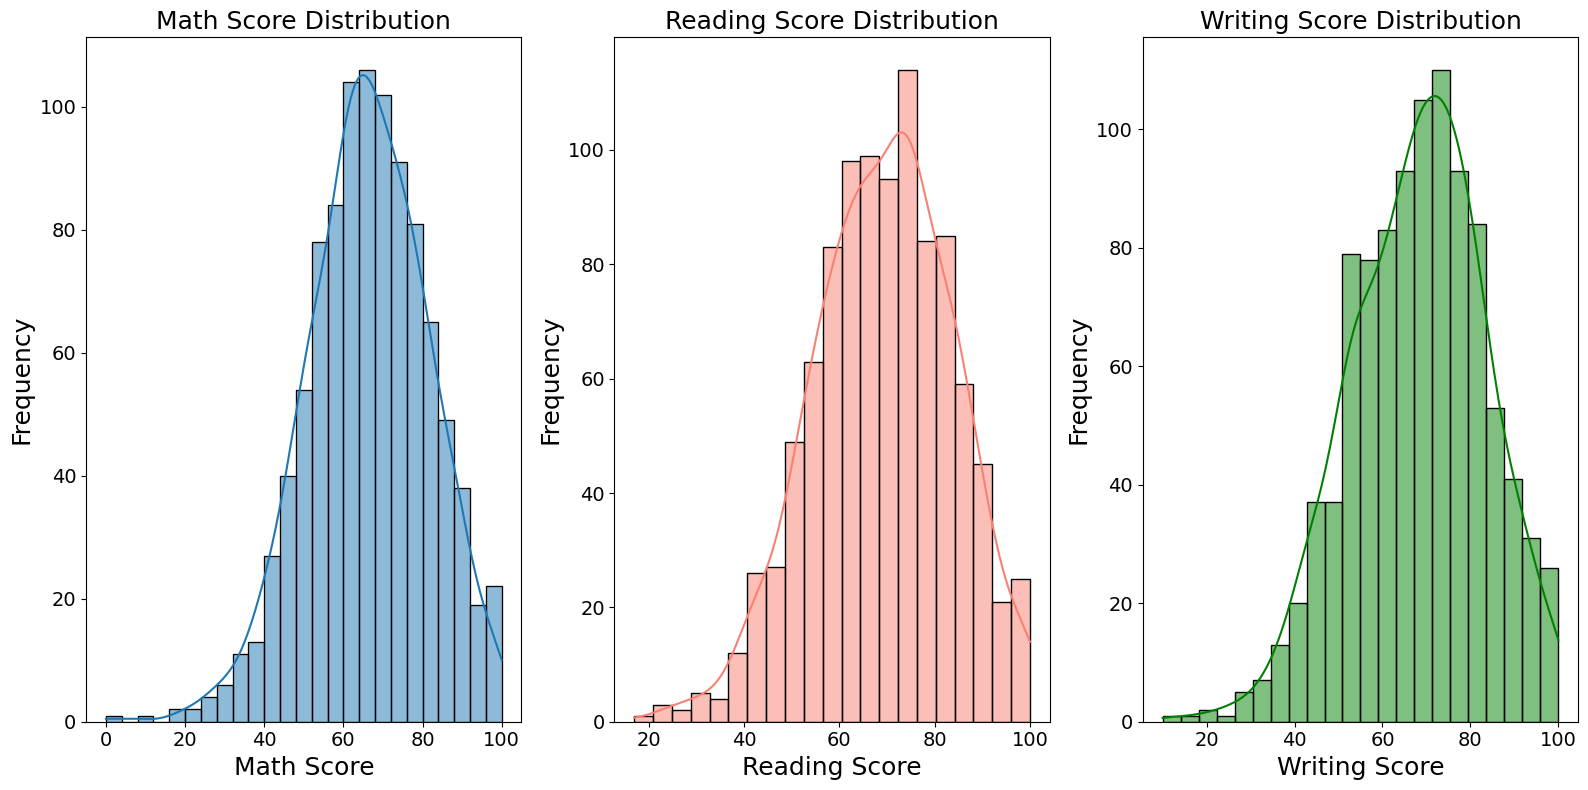

In [70]:
plt.figure(figsize=(16, 8))

# Histogram for math scores
plt.subplot(1, 3, 1)
sns.histplot(Numerical_Columns['math_score'], kde=True)
plt.title('Math Score Distribution', fontsize=18)
plt.xlabel('Math Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for reading scores
plt.subplot(1, 3, 2)
sns.histplot(Numerical_Columns['reading_score'], kde=True, color='salmon')
plt.title('Reading Score Distribution', fontsize=18)
plt.xlabel('Reading Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for writing scores
plt.subplot(1, 3, 3)
sns.histplot(Numerical_Columns['writing_score'], kde=True, color='green')
plt.title('Writing Score Distribution', fontsize=18)
plt.xlabel('Writing Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


As we can see this 3 are normal Distribution

- Create a bar plot to show the average scores in math, reading, and writing
for each gender.

# Using Matplotlib:

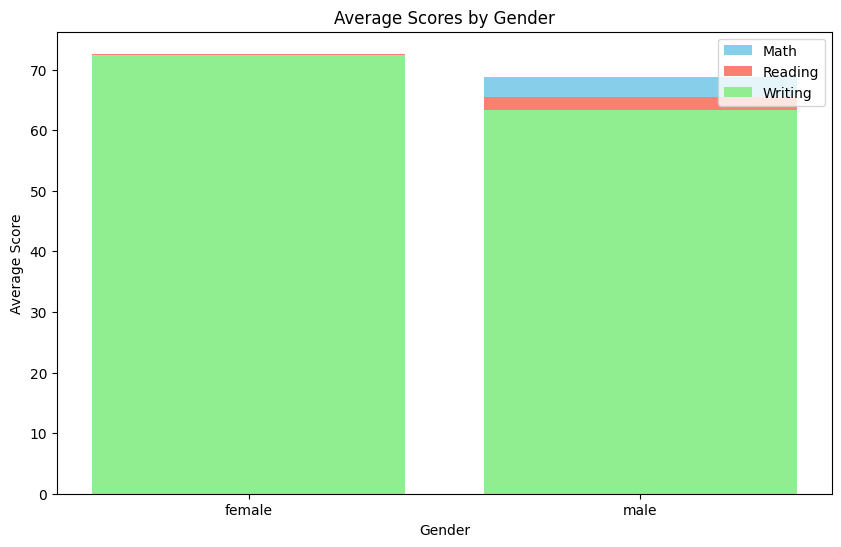

In [71]:
# Calculate average scores for each gender
avg_scores = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
plt.figure(figsize=(10, 6))

# Plot the bar plot for scores
plt.bar(avg_scores['gender'], avg_scores['math_score'], color='skyblue', label='Math')
plt.bar(avg_scores['gender'], avg_scores['reading_score'], color='salmon', label='Reading')
plt.bar(avg_scores['gender'], avg_scores['writing_score'], color='lightgreen', label='Writing')
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.legend()
plt.show()

# Using Seaborn:

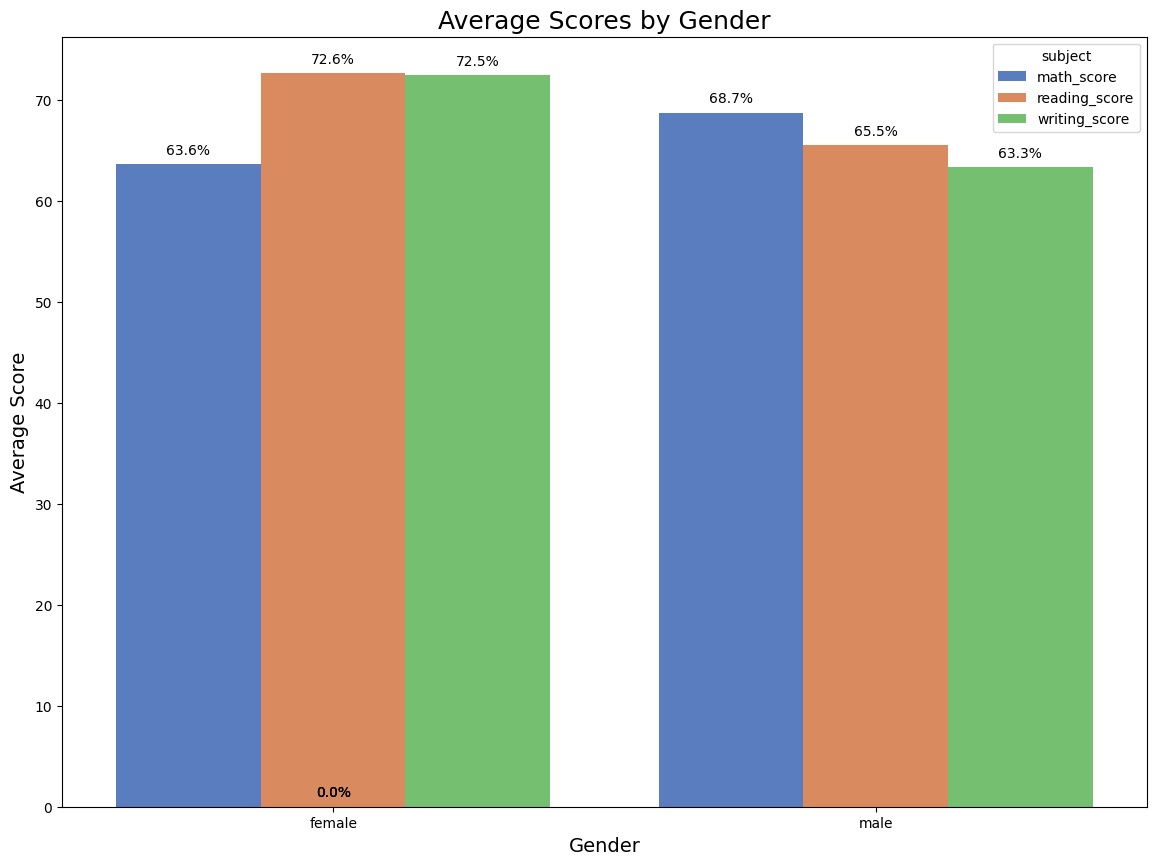

In [72]:
# Calculate average scores for each gender
avg_scores = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
# Melt the DataFrame to make it suitable for Seaborn
avg_scores_melted = avg_scores.melt(id_vars='gender', var_name='subject', value_name='average_score')

plt.figure(figsize=(14, 10))
sns.barplot(data=avg_scores_melted, x='gender', y='average_score', hue='subject', palette='muted')

# Add percentage values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title('Average Scores by Gender', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.show()

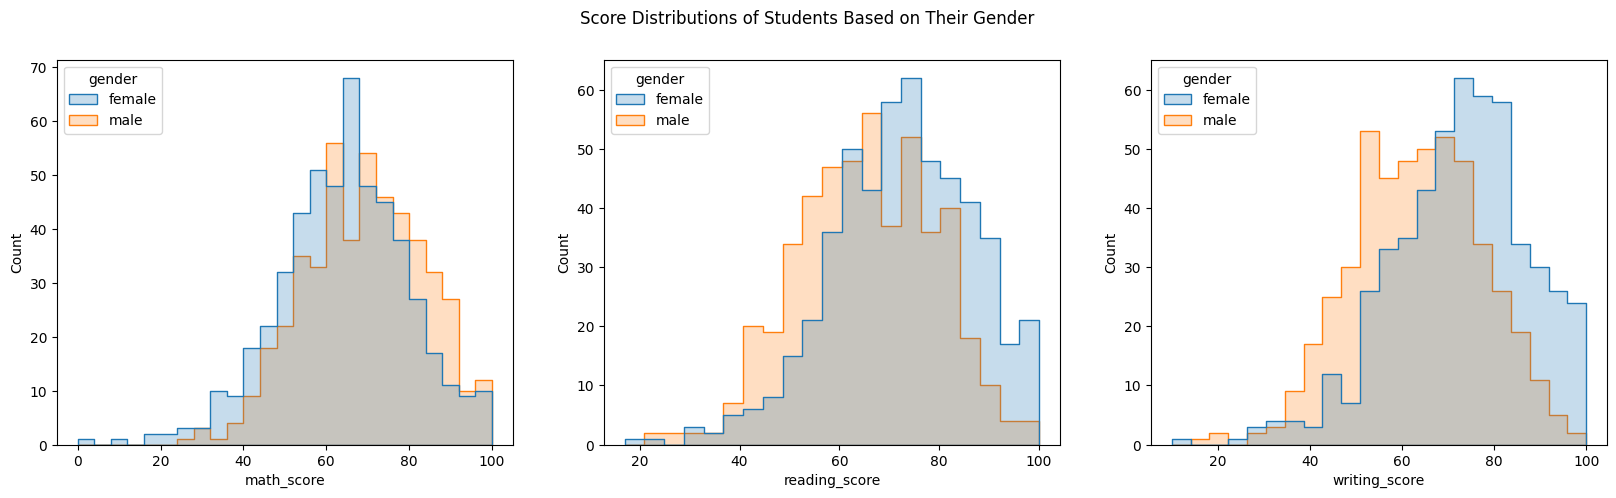

In [73]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

fig.suptitle('Score Distributions of Students Based on Their Gender')

m= sns.histplot(df, x='math_score',    ax=ax[0], hue='gender', element='step')
r= sns.histplot(df, x='reading_score', ax=ax[1], hue='gender', element='step')
w= sns.histplot(df, x='writing_score', ax=ax[2], hue='gender', element='step')

sns.move_legend(m, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(r, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(w, "upper left", bbox_to_anchor=(0, 1))

Interesting! Based on what we can observe in this data, male students who took the math tests got slightly higher scores than female students, though female students who took the reading and writing scores got slightly higher scores than male students.

- Create a scatter plot to show the relationship between math, reading, and
writing scores.

# Using Matplotlib:

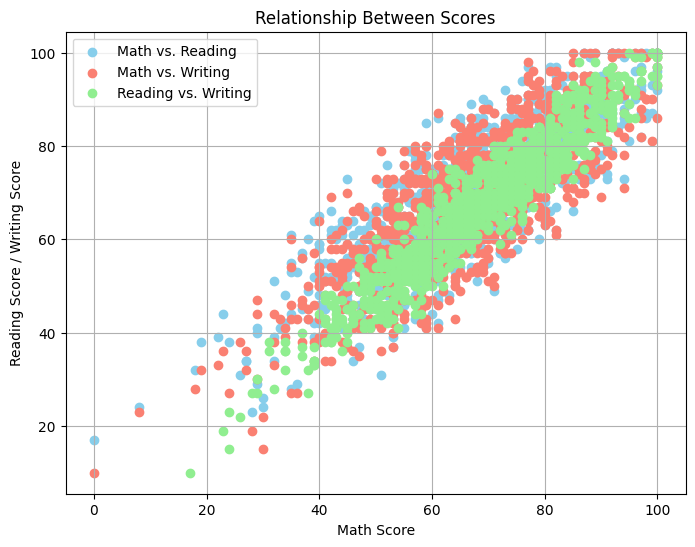

In [74]:
plt.figure(figsize=(8, 6))

# math vs. reading scores
plt.scatter(df['math_score'], df['reading_score'], color='skyblue', label='Math vs. Reading')
# math vs. writing scores
plt.scatter(df['math_score'], df['writing_score'], color='salmon', label='Math vs. Writing')
# reading vs. writing scores
plt.scatter(df['reading_score'], df['writing_score'], color='lightgreen', label='Reading vs. Writing')

plt.title('Relationship Between Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score / Writing Score')
plt.legend()
plt.grid(True)
plt.show()

# Using Seaborn:

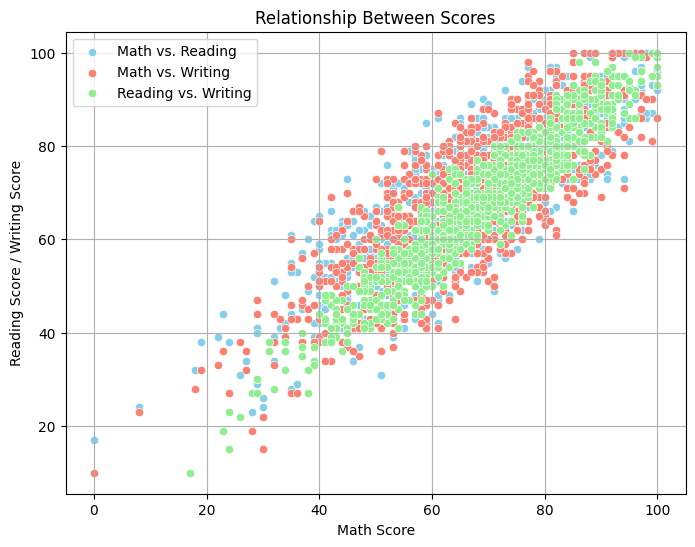

In [75]:
plt.figure(figsize=(8, 6))

# Scatter plot using Seaborn
sns.scatterplot(data=df, x='math_score', y='reading_score', color='skyblue', label='Math vs. Reading')
sns.scatterplot(data=df, x='math_score', y='writing_score', color='salmon', label='Math vs. Writing')
sns.scatterplot(data=df, x='reading_score', y='writing_score', color='lightgreen', label='Reading vs. Writing')

plt.title('Relationship Between Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score / Writing Score')
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='writing_score', ylabel='reading_score'>

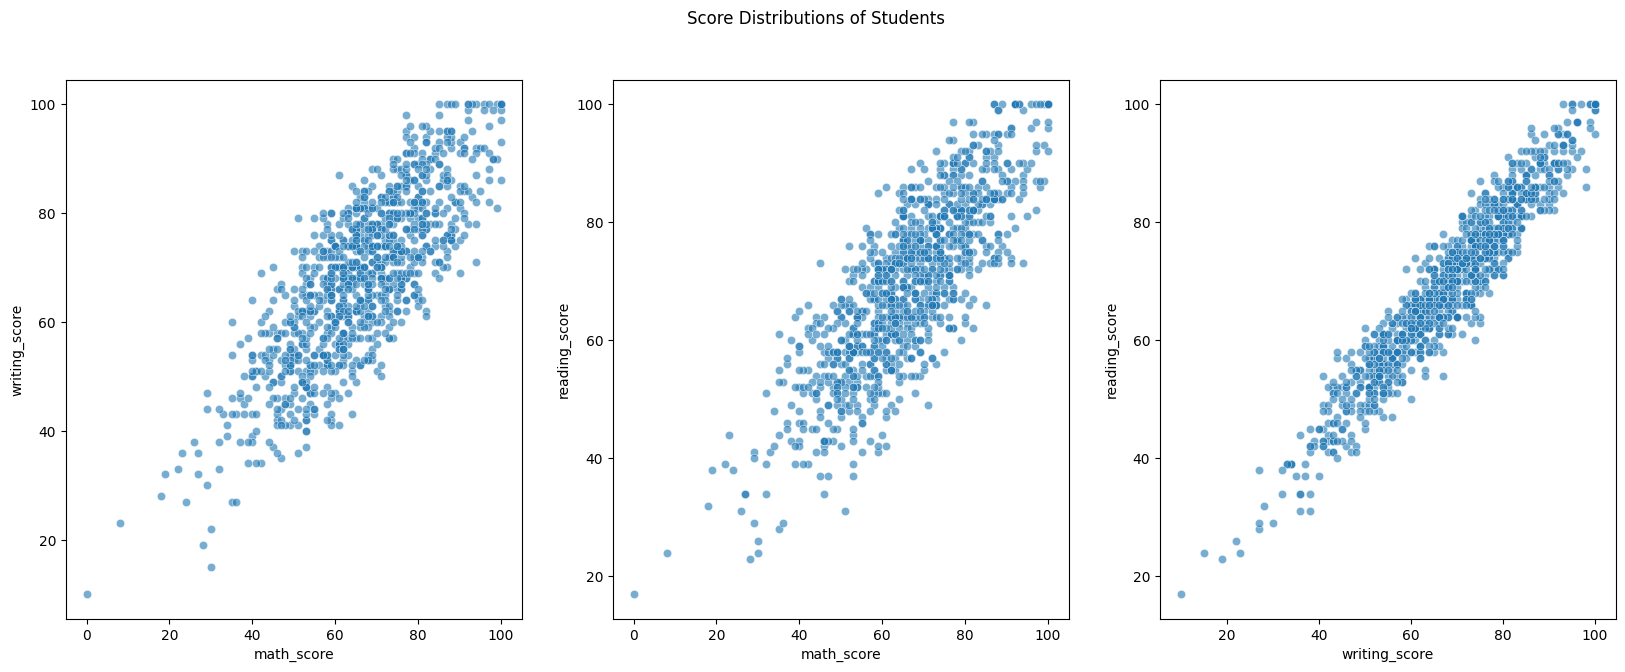

In [76]:
fig, ax = plt.subplots(ncols=3, figsize=(20,7))

fig.suptitle('Score Distributions of Students')

sns.scatterplot(data=df, x='math_score', y='writing_score', ax=ax[0], alpha=0.6)
sns.scatterplot(data=df, x='math_score', y='reading_score', ax=ax[1], alpha=0.6)
sns.scatterplot(data=df, x='writing_score', y='reading_score', ax=ax[2], alpha=0.6)

The graph shows that the variables have positive correlation, though reading and writing scores plots are closer to each other than the other graphs that includes the math score

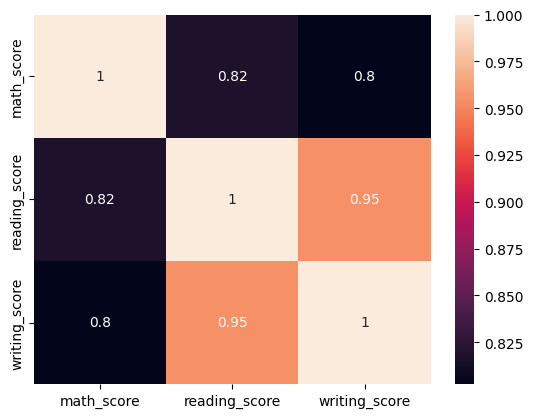

In [77]:
sns.heatmap(Numerical_Columns.corr(), annot = True )
plt.show()

With this correlation heatmap, its easy to tell that reading and writing scores are very correlated with each other while math scores also correlate with the other scores but not as high as reading and writing scores correlation

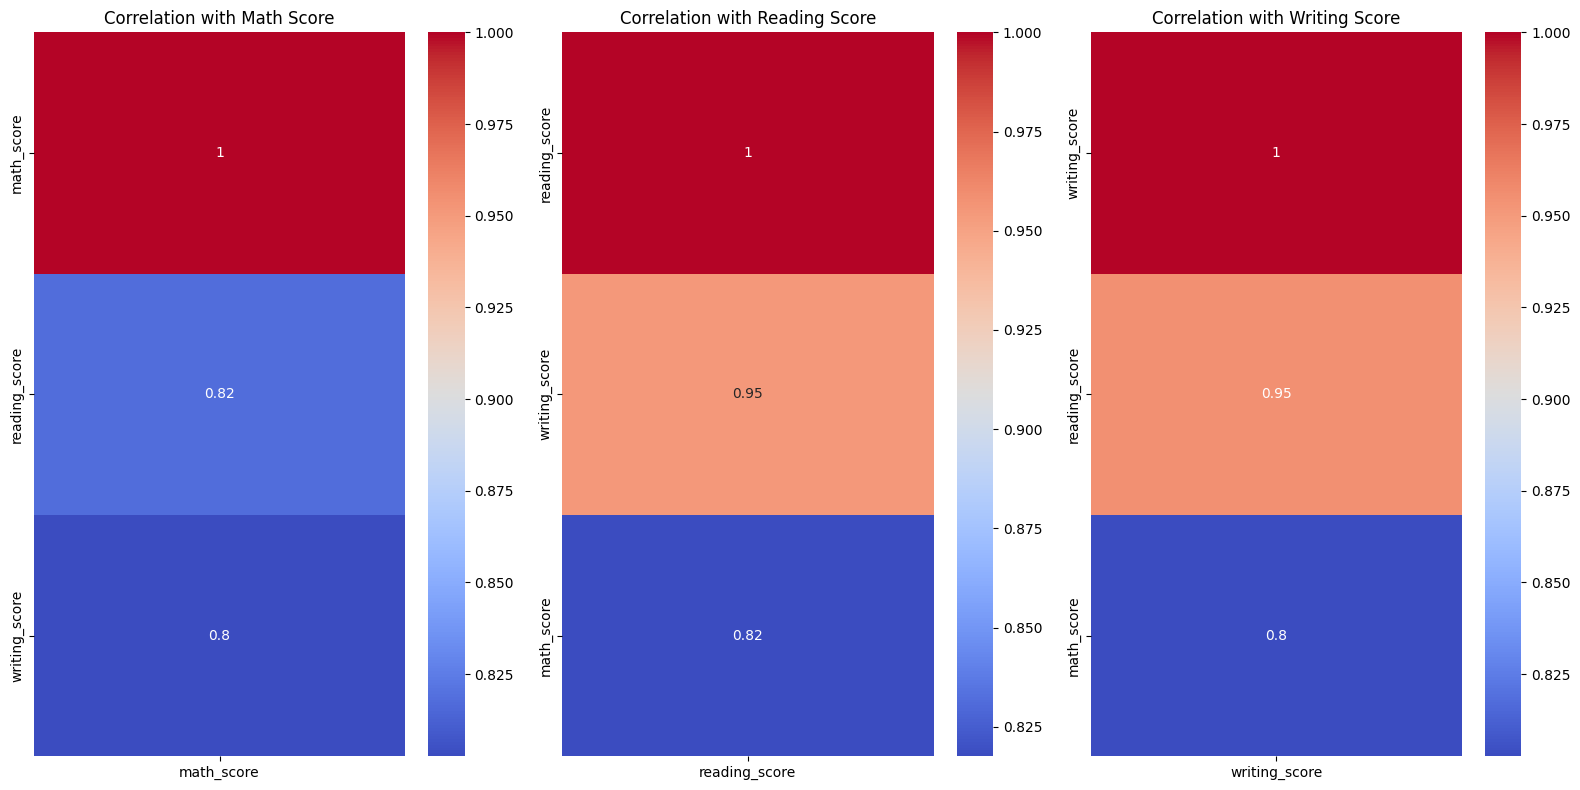

In [78]:
plt.figure(figsize=(16, 8))

# math score correlation
plt.subplot(1, 3, 1)
sns.heatmap(Numerical_Columns.corr()[['math_score']].sort_values(by='math_score', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Math Score')
# reading score correlation
plt.subplot(1, 3, 2)
sns.heatmap(Numerical_Columns.corr()[['reading_score']].sort_values(by='reading_score', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Reading Score')
# writing score correlation
plt.subplot(1, 3, 3)
sns.heatmap(Numerical_Columns.corr()[['writing_score']].sort_values(by='writing_score', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Writing Score')
plt.tight_layout()
plt.show()


<b><font color='green'><h2>Task 4 has been DONE Successfully.</h2></font></b>

<b><h1 style='color:yellow'>Task: 5</h1></b>
Perform basic statistical analysis:
- Calculate mean, median, and mode for math, reading, and writing scores.
- Calculate the standard deviation for math, reading, and writing scores.
- Test if there's a significant difference between male and female students'
performance in math, reading, and writing using an appropriate statistical
test (e.g., t-test).

In [79]:
# Calculate mean
mean_scores = Numerical_Columns[['math_score', 'reading_score', 'writing_score']].mean()

# Calculate median
median_scores = Numerical_Columns[['math_score', 'reading_score', 'writing_score']].median()

# Calculate mode
# mode() returns a DataFrame, so we use iloc[0] to get the first row
mode_scores = Numerical_Columns[['math_score', 'reading_score', 'writing_score']].mode().iloc[0]

# Combine results into a DataFrame
summary_stats = pd.DataFrame({'Mean': mean_scores, 'Median': median_scores, 'Mode': mode_scores})

summary_stats


Mean  Median  Mode
math_score     66.089    66.0    65
reading_score  69.169    70.0    72
writing_score  68.054    69.0    74

In [80]:
# we can see like this as well
Numerical_Columns.math_score.describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

    """Here:
    - mean: 66.089
    - median: 66.0
    - mode: 66.0 (Most Frequent Number)
    Both Result are same have a look
    """

My hand note will make you Clear All that how we calculate Mean, Median, Mode

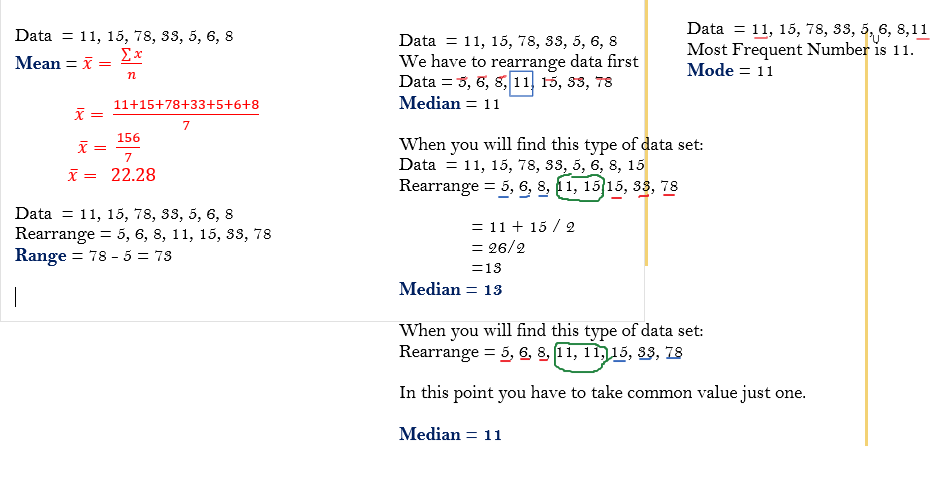

- Calculate the standard deviation for math, reading, and writing scores.

In [81]:
# Calculate standard deviation
print('Here is the STD of math, reading, writing')
std_scores = Numerical_Columns[['math_score', 'reading_score', 'writing_score']].std()
std_scores


Here is the STD of math, reading, writing


math_score       15.163080
reading_score    14.600192
writing_score    15.195657
dtype: float64

My Hand Note For Standard Deviation:
From Here you will know the Equations of STD


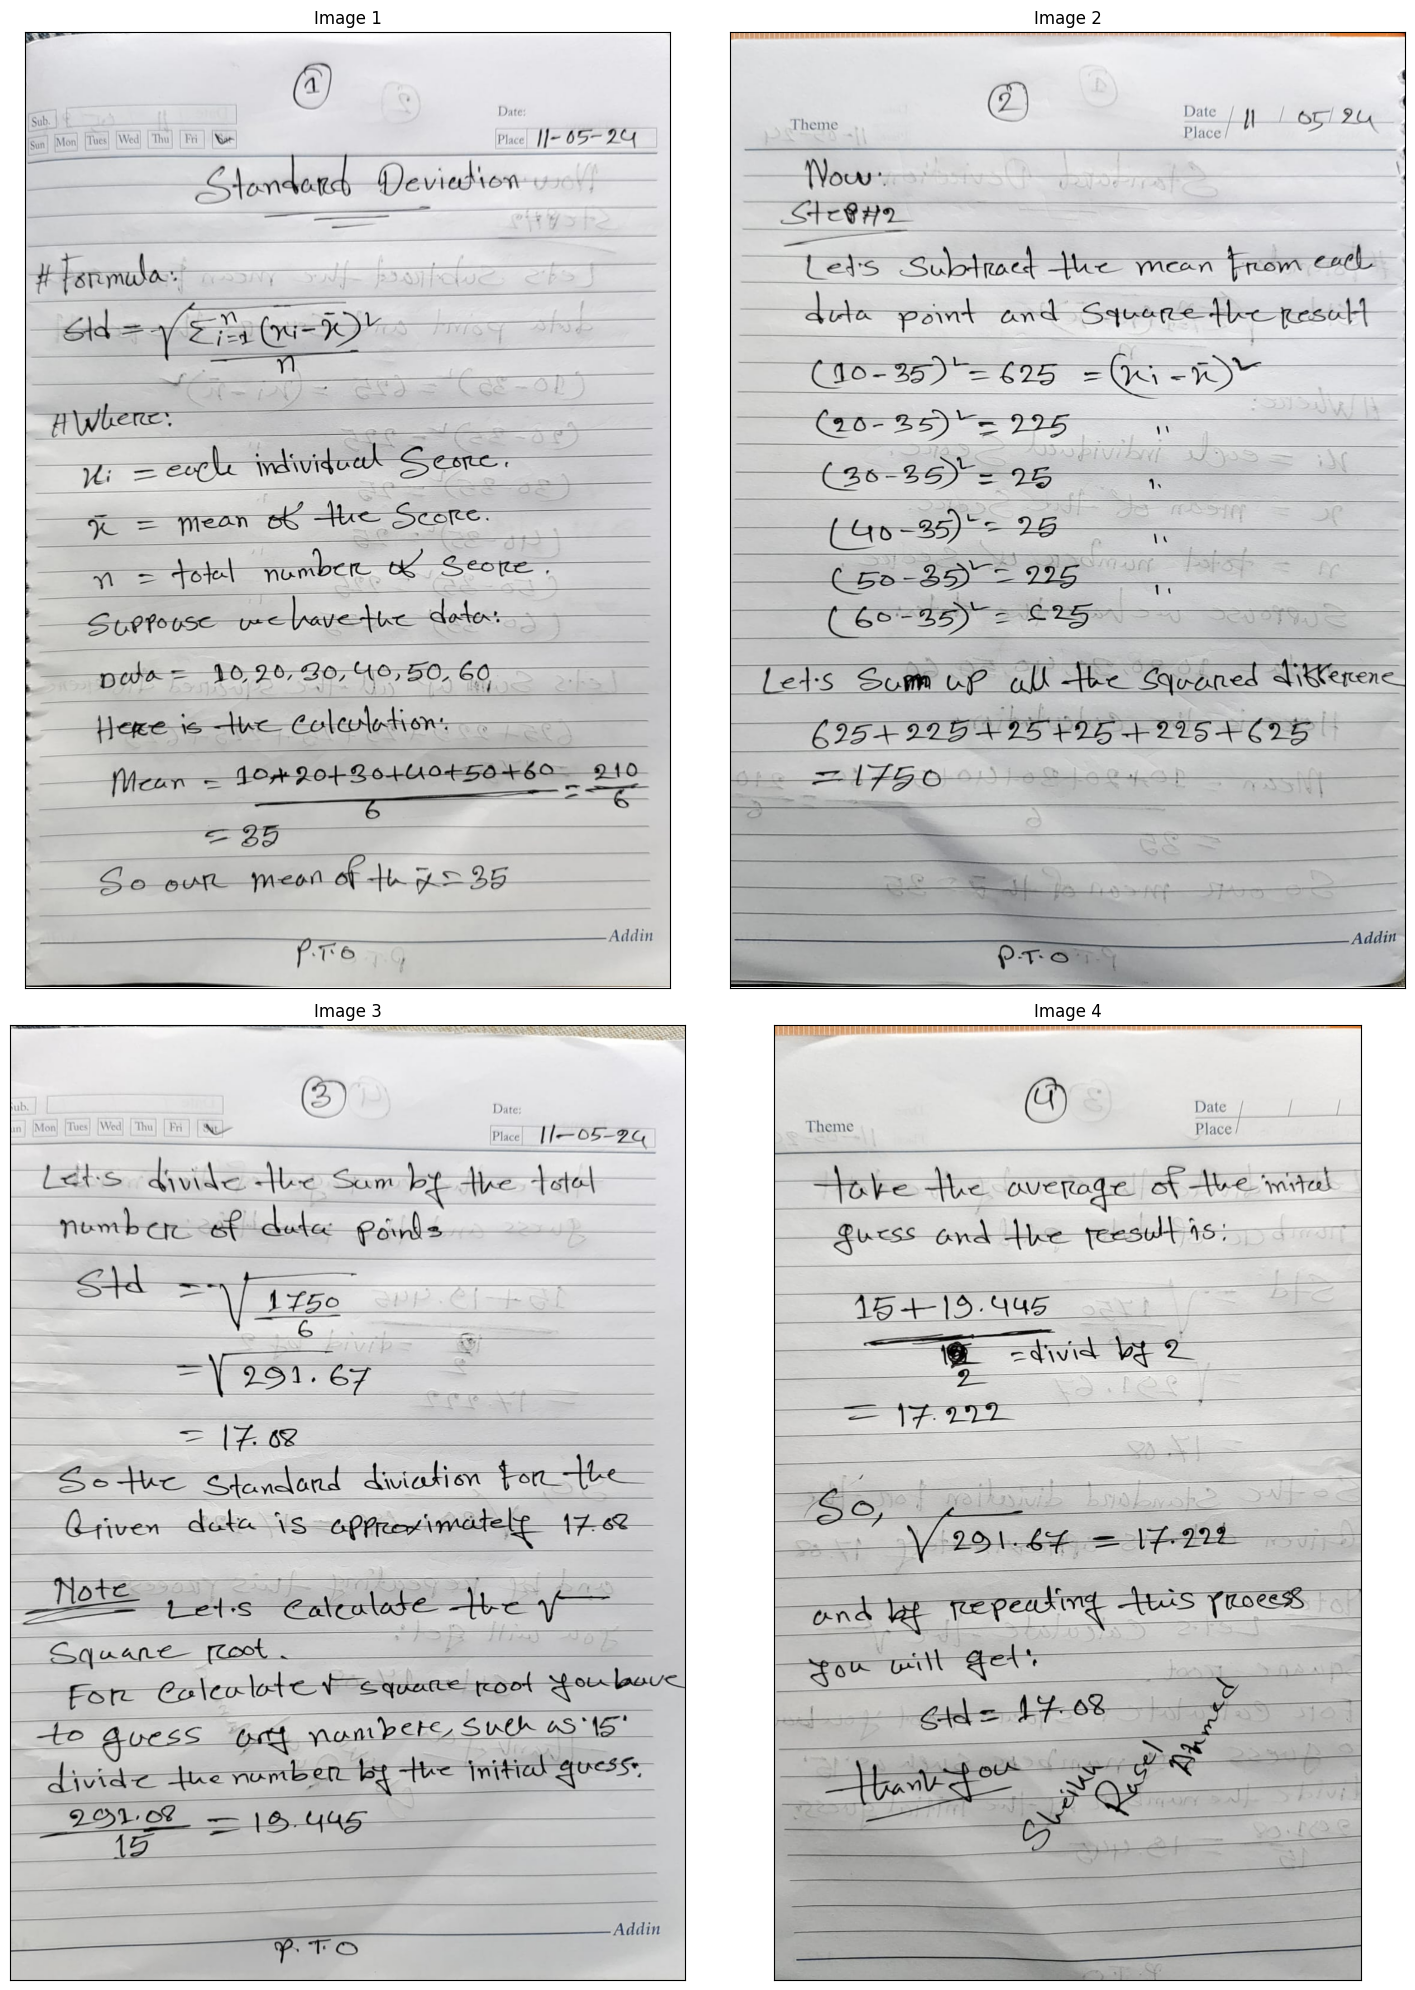

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set up subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 20))

# Load and display each image in the specified subplot
img1 = mpimg.imread('C:/Users/SRA/Desktop/mestersCourse/static/img/std_01.jpeg')
axs[0, 0].imshow(img1)
axs[0, 0].set_title('Image 1')

img2 = mpimg.imread('C:/Users/SRA/Desktop/mestersCourse/static/img/std_02.jpeg')
axs[0, 1].imshow(img2)
axs[0, 1].set_title('Image 2')

img3 = mpimg.imread('C:/Users/SRA/Desktop/mestersCourse/static/img/std_03.jpeg')
axs[1, 0].imshow(img3)
axs[1, 0].set_title('Image 3')

img4 = mpimg.imread('C:/Users/SRA/Desktop/mestersCourse/static/img/std_04.jpeg')
axs[1, 1].imshow(img4)
axs[1, 1].set_title('Image 4')

# Hide axis labels
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
print("My Hand Note For Standard Deviation:\nFrom Here you will know the Equations of STD")
plt.show()


- Test if there's a significant difference between male and female students'
performance in math, reading, and writing using an appropriate statistical
test (e.g., t-test).

In [83]:
from scipy.stats import ttest_ind

# Let's separate data for male and female students
male_scores = df[df['gender'] == 'male']
female_scores = df[df['gender'] == 'female']

# Let's perform t-tests for each subject
t_stat_math, p_value_math = ttest_ind(male_scores['math_score'], female_scores['math_score'])
t_stat_reading, p_value_reading = ttest_ind(male_scores['reading_score'], female_scores['reading_score'])
t_stat_writing, p_value_writing = ttest_ind(male_scores['writing_score'], female_scores['writing_score'])

# Let's print results
print(f"Math:\nt-statistic: {t_stat_math}\np-value: {p_value_math}")
if p_value_math < 0.05:
    print("The difference in math scores between male and female students is statistically significant.")
else:
    print("The difference in math scores between male and female students is not statistically significant.")
    
# Reading Score
print(f"\nReading:\nt-statistic: {t_stat_reading}\np-value: {p_value_reading}")
if p_value_reading < 0.05:
    print("The difference in reading scores between male and female students is statistically significant.")
else:
    print("The difference in reading scores between male and female students is not statistically significant.")

# Writing Score
print(f"\nWriting:\nt-statistic: {t_stat_writing}\np-value: {p_value_writing}")
if p_value_writing < 0.05:
    print("The difference in writing scores between male and female students is statistically significant.")
else:
    print("The difference in writing scores between male and female students is not statistically significant.")


Math:
t-statistic: 5.383245869828983
p-value: 9.120185549328822e-08
The difference in math scores between male and female students is statistically significant.

Reading:
t-statistic: -7.959308005187657
p-value: 4.680538743933289e-15
The difference in reading scores between male and female students is statistically significant.

Writing:
t-statistic: -9.979557910004507
p-value: 2.019877706867934e-22
The difference in writing scores between male and female students is statistically significant.


<b><h3><font color="green">Task 5 has been done successfully</font></h3></b>

<h1><b><font color="yellow">Task: 6</font></b></h1>
Document your findings:

- Provide explanations and interpretations for each plot and observation.
- Clearly state any conclusions you can draw from your analysis.

Before That let's see Other two columns "parental_level_of_education" and "lunch" that how it's affects

In [86]:
df.head()

gender     race parental_level_of_education         lunch  \
0  female  group B           bachelor's degree      standard   
1  female  group C                some college      standard   
2  female  group B             master's degree      standard   
3    male  group A          associate's degree  free/reduced   
4    male  group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

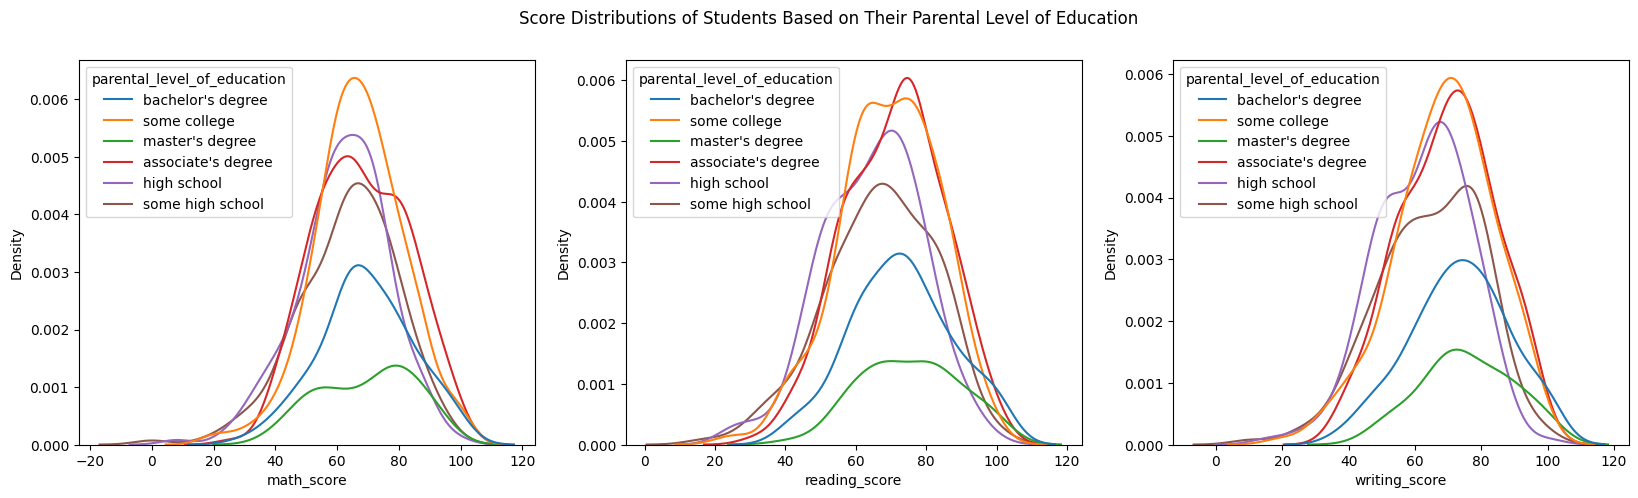

In [87]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

fig.suptitle('Score Distributions of Students Based on Their Parental Level of Education')

m= sns.kdeplot(data=df, x='math_score', ax=ax[0], hue='parental_level_of_education')
r= sns.kdeplot(data=df, x='reading_score', ax=ax[1], hue='parental_level_of_education')
w= sns.kdeplot(data=df, x='writing_score', ax=ax[2], hue='parental_level_of_education')

sns.move_legend(m, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(r, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(w, "upper left", bbox_to_anchor=(0, 1))

Based on the graph above, they all seem to be close to each other and it means that parental level of education doesnt have that much of an impact on their test scores

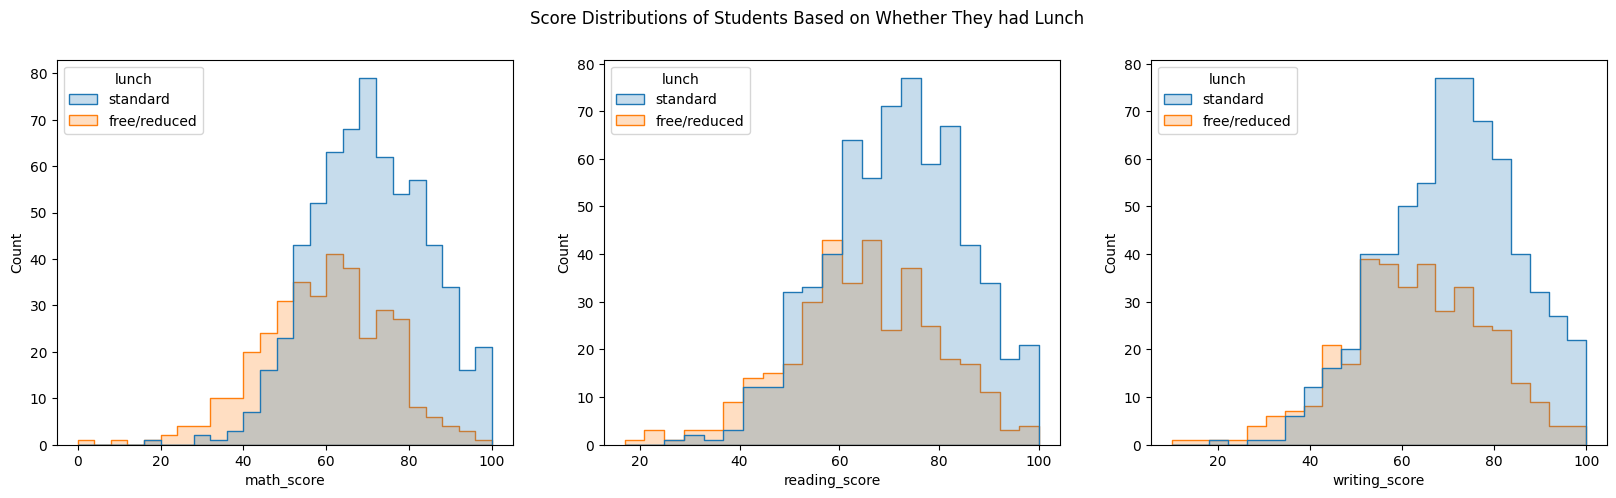

In [88]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

fig.suptitle('Score Distributions of Students Based on Whether They had Lunch')

m= sns.histplot(df, x='math_score', ax=ax[0], hue='lunch', element='step')
r= sns.histplot(df, x='reading_score', ax=ax[1], hue='lunch', element='step')
w= sns.histplot(df, x='writing_score', ax=ax[2], hue='lunch', element='step')

sns.move_legend(m, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(r, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(w, "upper left", bbox_to_anchor=(0, 1))

Its pretty obvious that student who are standard at lunch, they got higher score than thosw who didn't

In [89]:
# Author    : Sheikh Rasel Ahmed
# Email     : shekhrasel59@gmail.com
# GitHub    : https://github.com/Rasel1435
# leetcode  : https://leetcode.com/shekh_rasel/
# Linkedin  : https://www.linkedin.com/in/shekhnirob1
# kaggle    : https://www.kaggle.com/sheikhraselahmed
# Website   : https://rasel1435.github.io/Sheikh-Rasel-Ahmed-Resume

# Thank You 